In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df = pd.read_csv('38_train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [59]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [60]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [61]:
x = df.drop(columns='Survived')
y = df['Survived']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [64]:
x_train['Age_Imputed'] = x_train['Age']
x_test['Age_Imputed'] = x_test['Age']

In [65]:
x_train['Age_Imputed'][x_train['Age_Imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_Imputed'][x_test['Age_Imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\4140447472.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_Imputed'][x_train['Age_Imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).val

In [66]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([ 4.  , 29.  , 33.  , 45.  , 17.  , 41.  , 34.  , 37.  , 48.  ,
       24.  , 25.  , 62.  , 21.  , 24.  , 16.  , 28.  , 28.  , 36.  ,
       61.  , 35.  , 31.  , 13.  , 28.  , 32.  , 19.  , 23.  , 32.  ,
       31.  , 32.  , 29.  , 18.  , 37.  , 36.  , 43.  , 27.  , 20.  ,
       51.  ,  1.  , 40.  , 54.  ,  6.  , 21.  , 21.  , 23.  , 14.5 ,
       49.  , 47.  , 21.  ,  4.  , 38.  , 45.  ,  3.  , 35.  , 18.  ,
       22.  , 42.  , 20.  , 39.  , 22.  , 24.  , 21.  , 50.  , 22.  ,
       24.  , 22.  , 18.  , 52.  , 27.  , 22.  , 40.5 , 16.  , 36.  ,
        2.  , 20.5 , 19.  ,  0.75, 42.  , 20.  , 24.  , 26.  , 21.  ,
       21.  , 45.  , 22.  , 24.  ,  2.  , 52.  , 16.  , 15.  , 32.  ,
       18.  , 18.  , 49.  , 24.  , 31.  , 22.  , 23.5 , 35.  , 42.  ,
       17.  , 25.  , 18.  , 16.  , 24.  , 26.  , 53.  , 28.  ,  5.  ,
       33.  , 11.  ,  9.  ,  1.  , 28.  ,  2.  , 40.  , 24.  , 38.  ,
       39.  , 16.  , 18.  , 65.  , 45.5 , 31.  , 33.  , 47.  , 35.  ,
       20.  , 50.  ,

In [67]:
x_train.head()

,Age,Fare,Age_Imputed
52,49.0,76.7292,49.0
766,NaN,39.6000,44.0
727,NaN,7.7375,21.0
442,25.0,7.7750,25.0
371,18.0,6.4958,18.0


C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2693691118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2693691118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

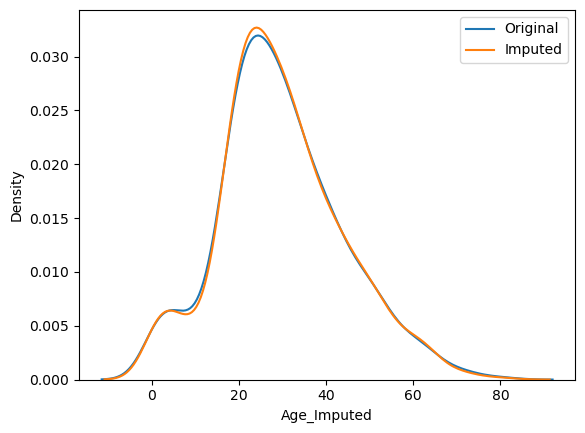

In [68]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_Imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [69]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ',x_train['Age_Imputed'].var())

Original variable variance:  200.5357466057866
Variance after random imputation:  196.58478129375456


In [70]:
x_train[['Fare', 'Age', 'Age_Imputed']].cov() ## red flag but its ogk

,Fare,Age,Age_Imputed
Fare,2510.950077,50.390458,28.591419
Age,50.390458,200.535747,200.535747
Age_Imputed,28.591419,200.535747,196.584781


<Axes: >

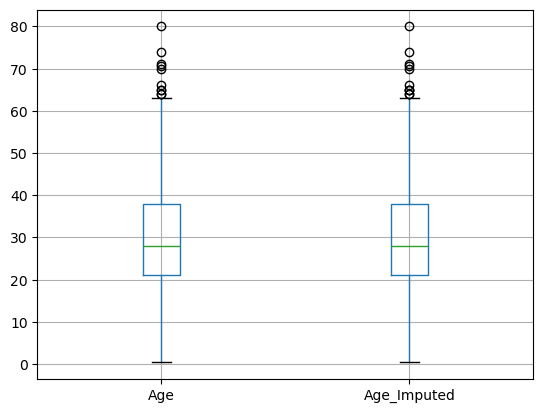

In [71]:
x_train[['Age', 'Age_Imputed']].boxplot()

In [72]:
#this code is useful for when user enters the same value(fare) so it is nececssary to give same age at all time that's why we write this code
sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [73]:
df1 = pd.read_csv('38_house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [74]:
df1.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [75]:
df1.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [76]:
x=df1
y=df1['SalePrice']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [83]:
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']
x_test['GarageQual_imputed'] = x_test['GarageQual']

In [84]:
x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu_imputed'].dropna().sample(x_train['FireplaceQu_imputed'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_test['FireplaceQu_imputed'].dropna().sample(x_test['FireplaceQu_imputed'].isnull().sum()).values

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\4287650881.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu_imputed'].dropna().sample(x_

In [86]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual_imputed'].dropna().sample(x_train['GarageQual_imputed'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_test['GarageQual_imputed'].dropna().sample(x_test['GarageQual_imputed'].isnull().sum()).values

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2633409005.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual_imputed'].dropna().sample(x_tra

In [95]:
#checking frequency of that columns values
# original and imputed should be near in frequnecy
temp = pd.concat(
        [
            x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
            x_train['GarageQual_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [96]:
temp

,original,imputed
TA,0.952813,0.952911
Fa,0.031760,0.031678
Gd,0.010889,0.011130
Po,0.002722,0.002568
Ex,0.001815,0.001712


In [97]:
temp = pd.concat(
        [
            x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
            x_train['FireplaceQu_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.489327,0.490582
TA,0.408867,0.409247
Fa,0.045977,0.044521
Po,0.029557,0.029966
Ex,0.026273,0.025685


C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

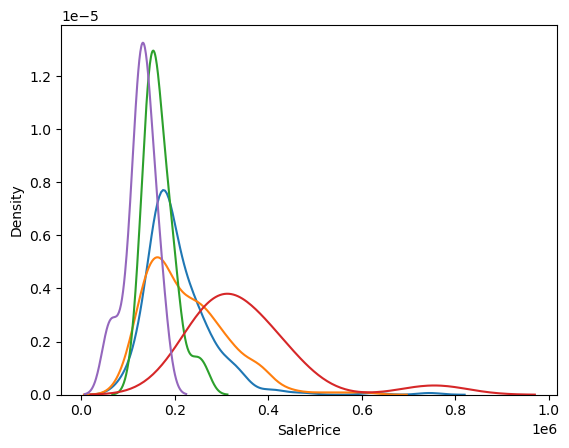

In [100]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

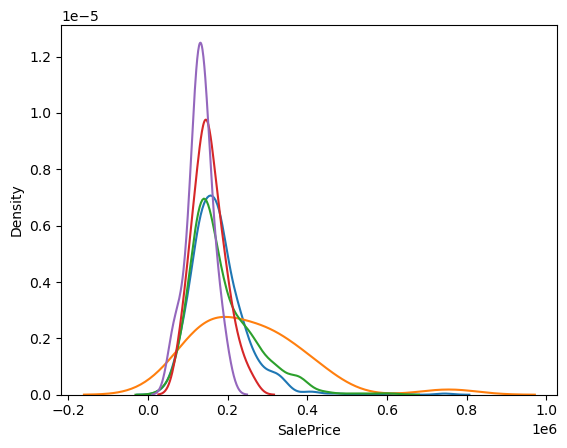

In [101]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2558975798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['GarageQual'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2558975798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

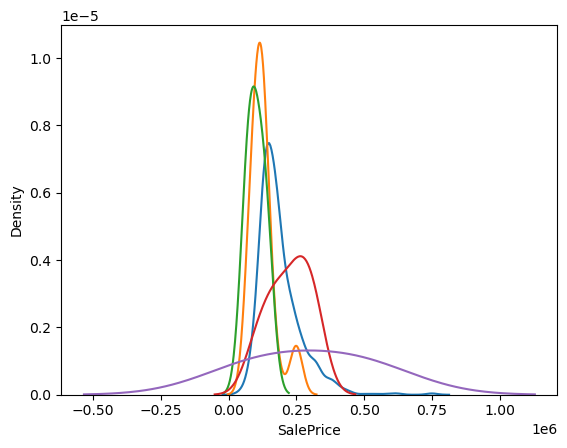

In [102]:
for category in x_train['GarageQual'].dropna().unique():
    sns.distplot(x_train[x_train['GarageQual'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2935844952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['GarageQual_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_14552\2935844952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

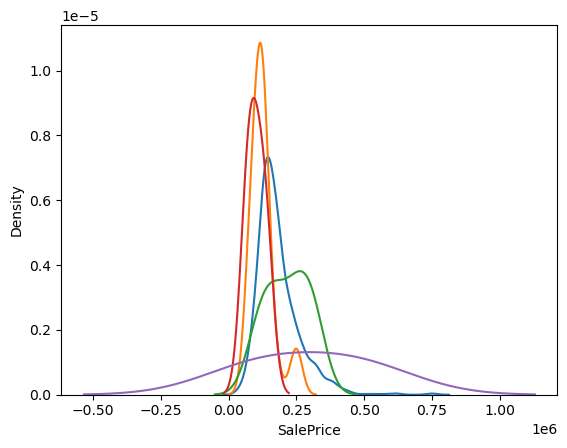

In [103]:
for category in x_train['GarageQual_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['GarageQual_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()